In [ ]:
import torch
import matplotlib.pyplot as plt

### 2. 정보이론
- **목표:** 정보량과 엔트로피 이해
- **핵심 개념:**
```
- Entropy 
- Conditional Entropy 
- KL Divergence 
```


### Entropy
어떤 사건의 확률이 매우 높다고 가정하자. 우리는 그 사건이 발생해도 별로 놀라지 않는다. 즉, 이 사건은 적은 정보를 제공한다. 반대로, 만약 사건이 불확실하다면, 그 사건이 일어났을 때 훨씬 유용한 정보를 제공한다. 그러므로, 정보량(information content)은 확률에 반비례한다. 
- $ H(X) = -\sum^{c}_{i=1} P(x_i)log_2P(x_i)$
- 왜 확률 $P(x_i)$에 $-log_2P(x_i)$를 취하는가 이것은 무엇을 의미하는가?
    - -log_2P(x_i)은 정보이론의 대가 섀넌이 정의한 정보량이다. (단위는 bit)
    - 확률은 0~1 사이 값을 지닌다.
    - $-log_2$를 취하면 항상 양수가 나온다. 또한 확률이 낮을수록 정보량이 커지도록 구현 할 수 있다.
    - 밑수가 2인 이유는 2의 배수로 표현하면 컴퓨터의 계산이 쉬워지기 때문이다. 또한 이를 bit라고 부른다. 
    - log를 취하면 곱셈이 덧셈으로 변해서 계산이 쉬워진다. 또한 뺄셈은 log내의 나눗셈과 같은데 이는 KL divergence에서 사용되는 개념이다.
    - 이를 시각화해보자.

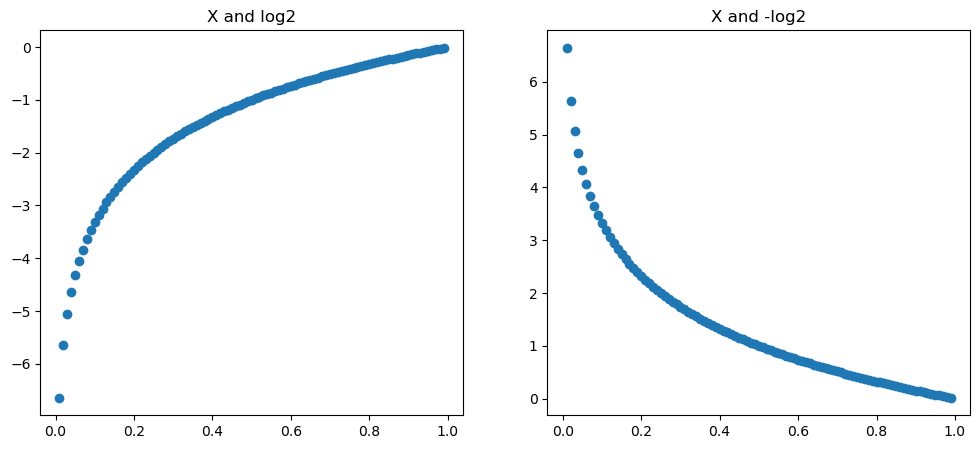

In [2]:
X = torch.arange(0, 1, 0.01)

log2 = torch.log2(X)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title("X and log2")
plt.scatter(X, log2)
plt.subplot(1,2,2)
plt.title("X and -log2")
plt.scatter(X, -log2)
plt.show()

방금 코드를 통해 정보량인 $-log_2P(x_i)$의 의미를 알아봤다. 이제 $\sum P(x_i)$의미를 알아보자. 엔트로피는 전체 상태에 대한 기대치의 형태로 바라볼 수 있다. 또한 모든 사건에 대한 정보량의 기댓값인 평균 정보량으로 정의할 수도 있다.
- $ H(X) = -\sum^{c}_{i=1} P(x_i)log_2P(x_i) = E[-log_2P(x)]$
- 예시를 통해 entropy를 구현해봤다.

In [3]:
def entropy(p: torch.tensor):
    p = p[p > 0]  # 0 확률 제거 (log문제 방지)
    if torch.sum(p) == 1:
        return -torch.sum(p*torch.log2(p))
    else:
        raise ValueError("Sum of p is not 1.")

prob1 = torch.tensor([1e-5, 99999e-5])
prob2 = torch.tensor([0.5, 0.5])
prob3 = torch.tensor([0.125, 0.125, 0.25, 0.5])

print(entropy(p=prob1).item())
print(entropy(p=prob2).item())
print(entropy(p=prob3).item())

0.00018054286192636937
1.0
1.75


### Cross Entropy
정보이론에서 교차 엔트로피란, 두 확률 분포 p 와 q를 구분하기 위해 필요한 평균 비트 수를 의미한다.

동일한 이벤트 공간의 두 분포 p와 q 사이의 교차 엔트로피는 다음과 같이 정의된다.

$H(p, q) = E_p[-log q]$

In [4]:
def cross_entropy(p: torch.tensor, q: torch.tensor):
    if torch.sum(p) == 1 and torch.sum(q) == 1 :
        return -torch.sum(p*torch.log2(q))
    else:
        raise ValueError("Sum of p is not 1.")
    

p = torch.tensor([0.5, 0.5])
q1 = torch.tensor([0.5, 0.5])
q2 = torch.tensor([0.9, 0.1])
print(cross_entropy(p, q1).item())
print(cross_entropy(p, q2).item())

1.0
1.736965537071228


### KL Divergence

쿨백-라이블러 발산(Kullback–Leibler divergence, KLD)은 두 확률분포의 차이를 계산하는 데에 사용하는 함수로, 어떤 이상적인 분포($P(X)$)에 대해, 그 분포를 근사하는 다른 분포($Q(X)$)를 사용해 샘플링을 한다면 발생할 수 있는 정보 엔트로피 차이를 계산한다. 

- $D_{KL}(P||Q) = \sum_iP(i)log{P(i) \over Q(i)}$


- 쿨백-라이블러 발산은 어떠한 확률분포 $P$가 있을 때, 샘플링 과정에서 그 분포를 근사적으로 표현하는 확률분포 $Q$를 $P$ 대신 사용할 경우 엔트로피 변화를 의미한다. 
- $D_{KL}(P||Q) = H(P, Q)-H(P)$

따라서, 원래의 분포가 가지는 엔트로피 $H(P)$와 $P$대신 $Q$를 사용할 때의 교차 엔트로피(cross entropy) H(P,Q)의 차이를 구하면,       
    $D_{KL}(P||Q) = (-\sum^{c}_{i=1} p(x_i)log_2q(x_i)) - (-\sum^{c}_{i=1} p(x_i)log_2p(x_i))$    
    = $-\sum^{c}_{i=1} p(x_i)(log_2q(x_i)-log_2p(x_i))$    
    = $-\sum^{c}_{i=1} p(x_i)(log_2{q(x_i) \over p(x_i)})$   
로, 원래 정의했던 식과 같은 결과가 나온다.

In [5]:
def KLD(p: torch.Tensor, q: torch.Tensor):
    return cross_entropy(p, q) - entropy(p)

# 테스트
p = torch.ones(4) / 4
print(p.sum())
q1 = torch.ones(4) / 4
q2 = torch.tensor([0.5,  0.1, 0.25, 0.15])

print("KL(p || q1) =", KLD(p, q1).item())
print("KL(p || q2) =", KLD(p, q2).item())
print("KL(q2 || p) =", KLD(q2, p).item())

tensor(1.)
KL(p || q1) = 0.0
KL(p || q2) = 0.2647233009338379
KL(q2 || p) = 0.25726234912872314
